In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("F:/telco churn dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [4]:
df.drop("customerID",axis = 'columns',inplace = True)

In [5]:
df['OnlineSecurity'].replace('No internet service','No', inplace=True)
df['OnlineBackup'].replace('No internet service','No', inplace=True)
df['DeviceProtection'].replace('No internet service','No', inplace=True)
df['TechSupport'].replace('No internet service','No', inplace=True)

df['StreamingTV'].replace('No internet service','No', inplace=True)
df['StreamingMovies'].replace('No internet service','No', inplace=True)


In [6]:
df['MultipleLines'].replace("No phone service","No", inplace =  True)
df['MultipleLines'].replace("No internet service","No", inplace =  True)

In [7]:
df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['MultipleLines'].shape

(7043,)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
feature = ['PaymentMethod']

In [12]:
for i in feature:
    df[i] = le.fit_transform(df[i])

In [13]:
df.PaymentMethod

0       2
1       3
2       3
3       0
4       2
       ..
7038    3
7039    1
7040    2
7041    3
7042    0
Name: PaymentMethod, Length: 7043, dtype: int32

In [14]:
df['gender'].replace({'Female':1,'Male': 0},inplace= True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,2,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,3,56.95,1889.5,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,3,53.85,108.15,Yes
3,0,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,0,42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,3,84.80,1990.5,No
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,1,103.20,7362.9,No
7040,1,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,2,29.60,346.45,No
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,3,74.40,306.6,Yes


In [15]:
df = pd.get_dummies(data = df,columns = ['InternetService', 'Contract','PaymentMethod'])



In [16]:
df.describe()

,gender,SeniorCitizen,tenure,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,32.371149,64.761692,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,24.559481,30.090047,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,29.000000,70.350000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,55.000000,89.850000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
for col in df:
    print( f'{col} : {df[col].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_0 : [0 1]
PaymentMethod_1 : [0 1]
PaymentMethod_2 : [1 0]
PaymentMethod_3 :

In [18]:
classes = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [19]:
for col in classes:
    df[col].replace({'Yes':1,'No': 0},inplace =True)

In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
import seaborn as sns

<AxesSubplot:>

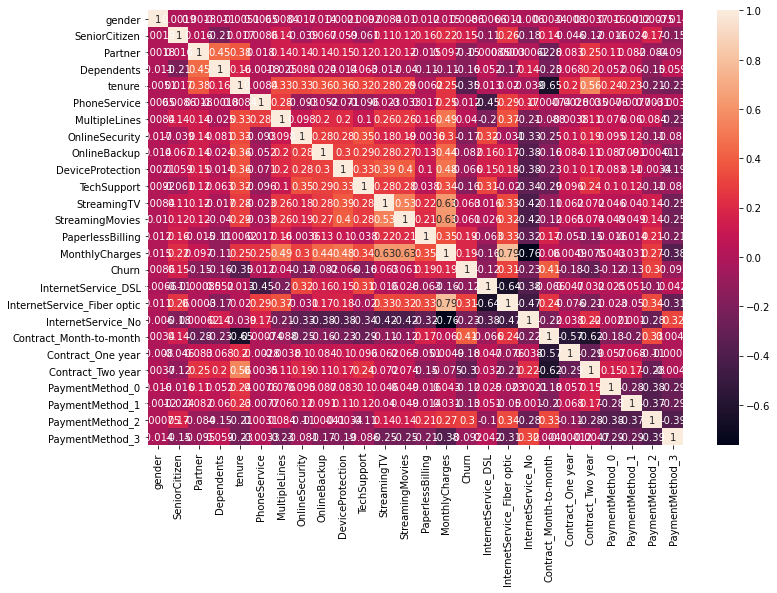

In [23]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True)

In [24]:
df.dtypes

gender                           int64
SeniorCitizen                    int64
Partner                          int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                    int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
PaperlessBilling                 int64
MonthlyCharges                 float64
TotalCharges                    object
Churn                            int64
InternetService_DSL              uint8
InternetService_Fiber optic      uint8
InternetService_No               uint8
Contract_Month-to-month          uint8
Contract_One year                uint8
Contract_Two year                uint8
PaymentMethod_0                  uint8
PaymentMethod_1                  uint8
PaymentMethod_2          

In [25]:
col_to_scale = ['TotalCharges','tenure','MonthlyCharges']         

### totalcharges feature got ' ' as object

In [26]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
488,1,0,1,1,0,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0
753,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
936,1,0,1,1,0,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
1082,0,0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1340,1,0,1,1,0,0,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
3331,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3826,0,0,1,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4380,1,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5218,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6670,1,0,1,1,0,1,1,0,1,1,...,1,0,0,0,0,1,0,0,0,1


In [27]:
df.iloc[488].TotalCharges

' '

### Removing empty values from features  

In [28]:
df1 = df[df.TotalCharges != ' '] 

In [29]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [30]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


C:\Users\kamal\anaconda1\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [32]:
df1[df1.Churn == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6,0,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1,0,0,0,72,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [40]:
col_to_scale= ['tenure','MonthlyCharges','TotalCharges']

In [41]:
from sklearn.preprocessing import MinMaxScaler 
le = MinMaxScaler()

df1[col_to_scale] = le.fit_transform(df1[col_to_scale])


<ipython-input-41-ff1440220842>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col_to_scale] = le.fit_transform(df1[col_to_scale])
C:\Users\kamal\anaconda1\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [43]:
df1[col_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [54]:
for i in df1:
    print(f'{i} :  {df1[i].unique()}')

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :  [0 1]
MultipleLines :  [0 1]
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  

In [59]:
X = df1.drop('Churn',axis = 'columns')
y = df1['Churn']


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [70]:

X_train.shape

(5625, 26)

In [78]:
y_train 

5664    1
101     0
2621    0
392     0
1327    1
       ..
3051    0
1730    1
4086    0
2259    0
2920    0
Name: Churn, Length: 5625, dtype: int64

In [72]:
X_train[:12]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0



## Building model in tensorflow [ANN]

In [74]:
from tensorflow import keras
import tensorflow as tf

In [102]:

model = keras.Sequential([
    keras.layers.Dense(26,input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
176/176 [==============================] - 4s 4ms/step - loss: 0.4775 - accuracy: 0.7716
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.8002
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8014
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4103 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8098
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4037 - accuracy: 0.8124
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8116
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8142
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4005 - accura

make sure last dense layer of your network shouuld be none or 1


If you're doing binary cross-entropy, then your dataset probably has 2 classes and the error is coming because your label vectors (both in testing and training) have the form [0,1,0,1,1,1,0,0,1,...]. To one-hot encode binary labels, the following function can be used: Labels = tf.one_hot(Labels, depth=2)

In [87]:
import numpy as np
import pandas as pd

In [101]:
y = np.reshape(-1,1)

In [108]:
y_test.shape

(1407,)

In [103]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7775


[0.4707877039909363, 0.7775408625602722]

In [229]:
yp = model.predict(X_test)
yp[:5]

array([[0.5294982 ],
       [0.15318361],
       [0.47855413],
       [0.7120367 ],
       [0.5394675 ]], dtype=float32)

In [231]:
y_test[:5]

5585    1
5572    0
3198    0
1001    1
5137    0
Name: Churn, dtype: int64

This yp [:10] shows greater than 0.5 is 1 and less is 0 so   this is close to 80 % accuracy

In [232]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [233]:
y_pred = np.round(y_pred)

In [234]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       374
           1       0.75      0.74      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



In [171]:
y_train.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

In [222]:
X_test.shape

(748, 26)

In [174]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# under_sampling for handling imbalance data

In [176]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]


In [177]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [179]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [182]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [210]:
y_test.shape

(748,)

In [209]:
X_test.shape

(748, 26)

In [183]:

model = keras.Sequential([
    keras.layers.Dense(26,input_shape = (26,), activation = 'relu'),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics =['accuracy']
)
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5890 - accuracy: 0.6903
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4987 - accuracy: 0.7639
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4894 - accuracy: 0.7702
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4837 - accuracy: 0.7709
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4787 - accuracy: 0.7729
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.7756
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4736 - accuracy: 0.7732
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4722 - accuracy: 0.7732
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4672 - accuracy: 0.7773
Epoch 11/

94/94 [==============================] - 0s 5ms/step - loss: 0.4058 - accuracy: 0.8110
Epoch 84/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8154
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.8074
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4042 - accuracy: 0.8130
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4027 - accuracy: 0.8137
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4050 - accuracy: 0.8127
Epoch 89/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4027 - accuracy: 0.8154
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4007 - accuracy: 0.8151
Epoch 91/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4002 - accuracy: 0.8130
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4011 - accuracy: 0.8187
Epoch 93/100


In [223]:
y_test.value_counts()

0    374
1    374
Name: Churn, dtype: int64

In [224]:
y_test[:5]

5585    1
5572    0
3198    0
1001    1
5137    0
Name: Churn, dtype: int64

In [225]:
y_pred = []
for element in yp:
    if element >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [226]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [227]:
X_test.shape

(748, 26)

In [236]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       374
           1       0.75      0.74      0.75       374

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748

